# Import Data Science Libraries

To get started, we need to import the data science libraries. We will use numpy to create data or pandas to read in data from a csv file:

In [1]:
import numpy as np
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go

# Import Data

We will use pandas to read in data as a dataframe ```df```. The CSV file is stored in the subfolder data and reads in details regarding the technical spec of cars. We need to make the same changes to the horsepower series to drop any non-numeric values and cast the remaining values to floats:

In [30]:
df = pd.read_csv("./data/mpg.csv")
df = df[df["horsepower"].str.isnumeric()]
df["horsepower"] = df["horsepower"].astype(float)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

# Plot

In [23]:
data = [go.Scatter(x=df["acceleration"],
                   y=df["displacement"],
                   text=df["name"],
                   mode="markers",
                   marker=dict(size=df["weight"]/400, color=df["cylinders"], showscale=True)
                  )
        ]
data

[Scatter({
     'marker': {'color': array([8, 8, 8, ..., 4, 4, 4], dtype=int64),
                'showscale': True,
                'size': array([8.76  , 9.2325, 8.59  , ..., 5.7375, 6.5625, 6.8   ])},
     'mode': 'markers',
     'text': array(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
                    ..., 'dodge rampage', 'ford ranger', 'chevy s-10'], dtype=object),
     'x': array([12. , 11.5, 11. , ..., 11.6, 18.6, 19.4]),
     'y': array([307., 350., 318., ..., 135., 120., 119.])
 })]

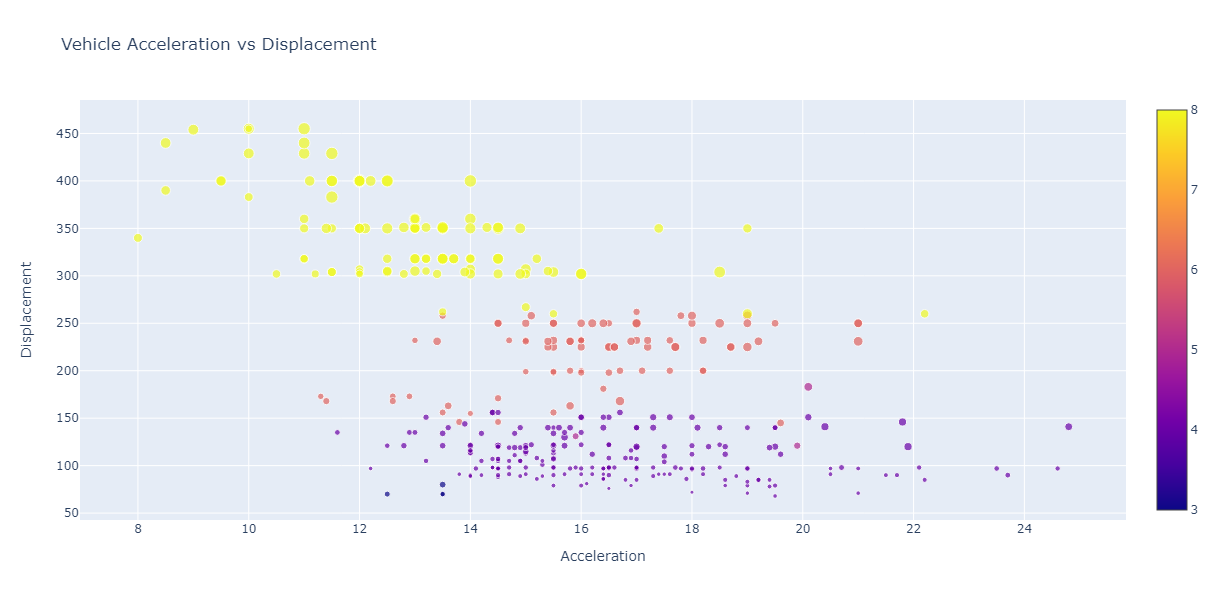

In [31]:
layout = go.Layout(title="Vehicle Acceleration vs Displacement", 
                   xaxis=dict(title="Acceleration"), 
                   yaxis=dict(title="Displacement"), 
                   height=600,
                  hovermode="closest")
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)